## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [5]:
!nvidia-smi

Sun Jan 21 05:19:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8               3W / 101W |   1787MiB / 12282MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import torch
print(torch.cuda.is_available())
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

True
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:30:42_Pacific_Standard_Time_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0
torch:  2.1 ; cuda:  cu118


In [7]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\zbot4\Programming\Repos\BoilerMakeXI\Model


## Install YOLOv5

In [8]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

c:\Users\zbot4\Programming\Repos\BoilerMakeXI\Model


c:\Users\zbot4\anaconda3\envs\machinelearning\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.3 🚀 Python-3.11.7 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
Setup complete ✅ (16 CPUs, 47.2 GB RAM, 481.6/930.9 GB disk)


## Install Supervision

In [ ]:
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.2.0


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

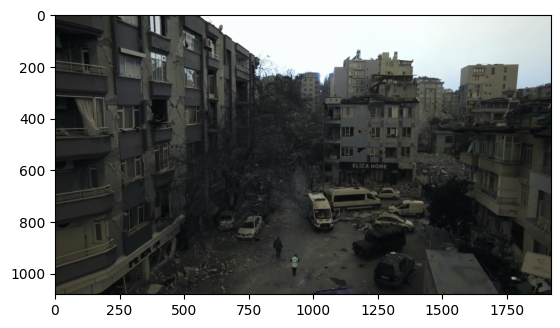

In [1]:
import supervision as sv
import cv2
from ultralytics import YOLO 
import matplotlib.pyplot as plt
import torch

# frame = next(iterator)
image = cv2.imread("./frame3323.png")
frame = image
model = YOLO("yolov8s.pt")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print(model)
plt.imshow(frame)

In [6]:

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)

detections = detections[detections.class_id == 0]
detections = detections[detections.confidence > 0.3]
print(detections)



0: 736x1280 2 persons, 7 cars, 2 buss, 56.1ms
Speed: 10.0ms preprocess, 56.1ms inference, 3.5ms postprocess per image at shape (1, 3, 736, 1280)
Detections(xyxy=array([[     843.02,      856.17,      881.19,       942.7],
       [     908.37,      925.39,      944.66,      1012.5]], dtype=float32), mask=None, confidence=array([    0.83296,     0.80761], dtype=float32), class_id=array([0, 0]), tracker_id=None)


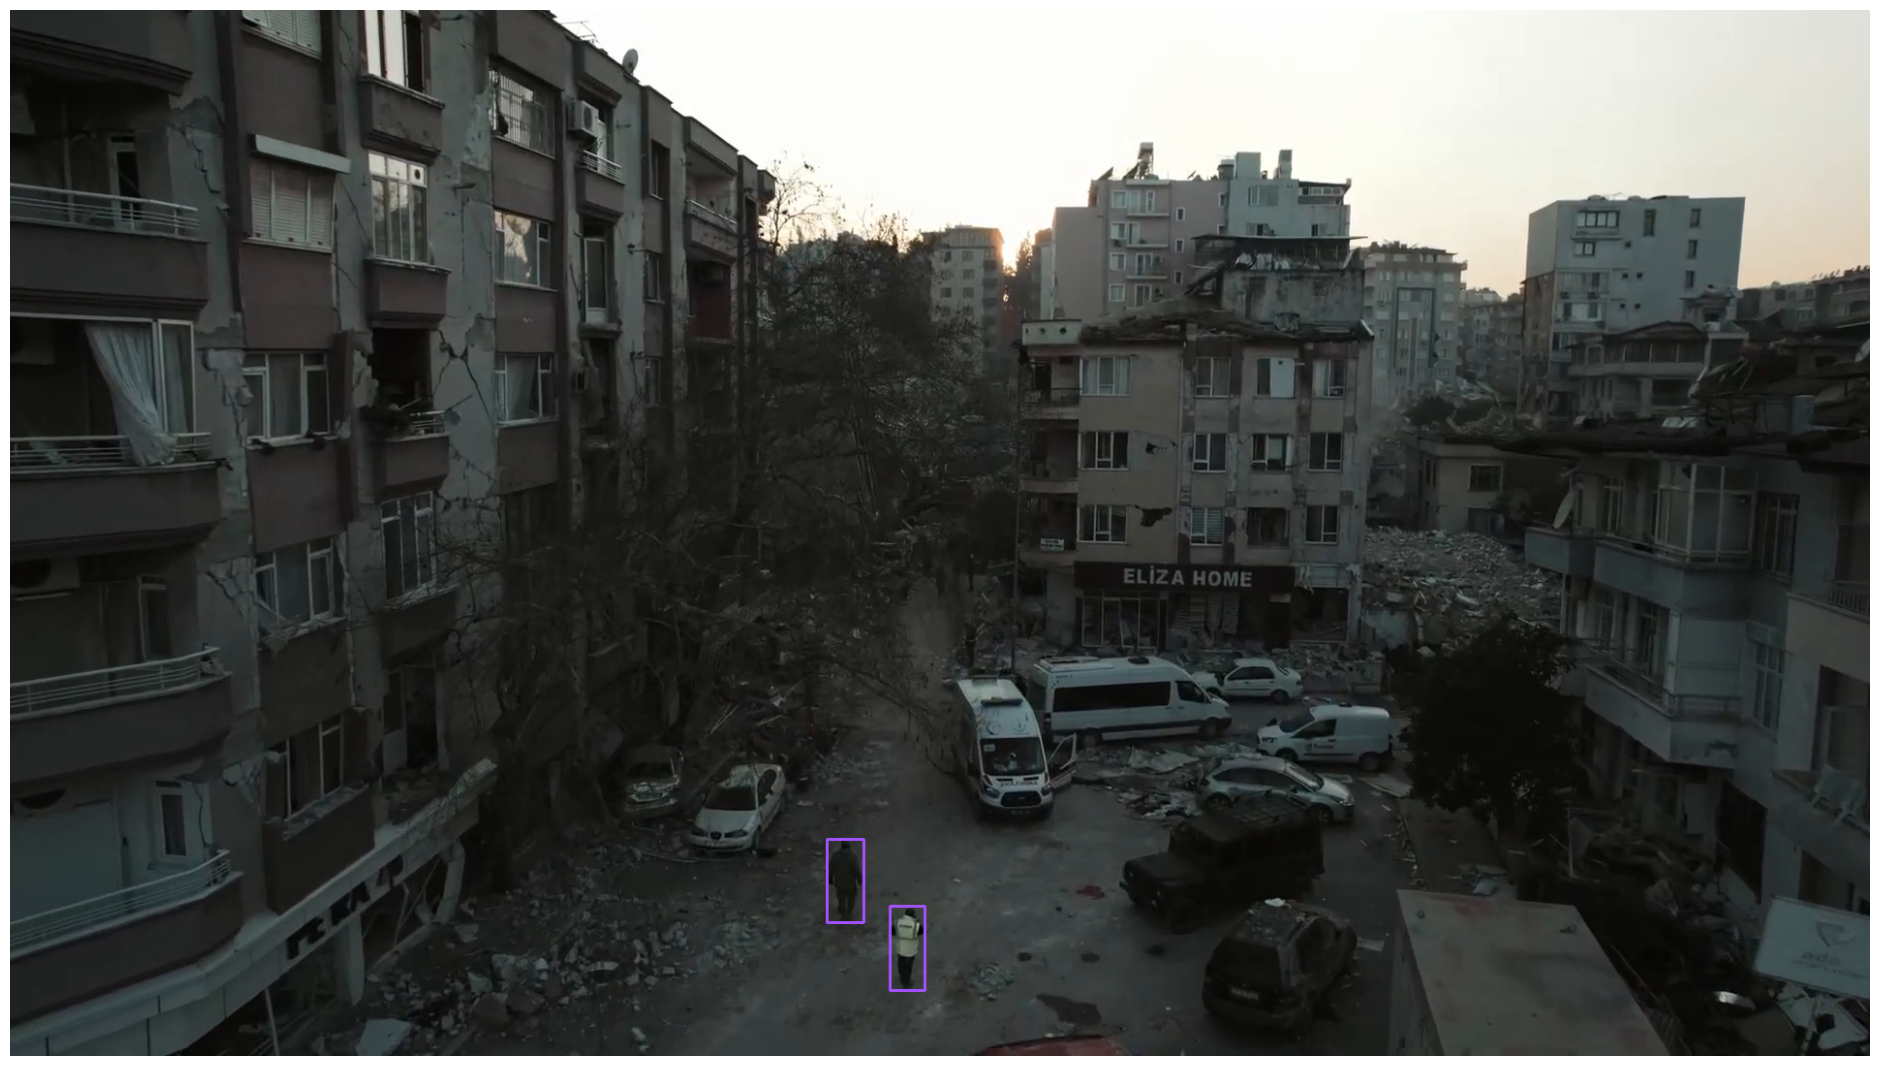

In [8]:
# annotate
box_annotator = sv.BoxAnnotator(thickness=2, text_thickness=2, text_scale=2)
#labels = [f"{model.names[class_id]}" for _, _, class_id, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections, skip_label=True)

%matplotlib inline
sv.plot_image(frame, (24, 24))


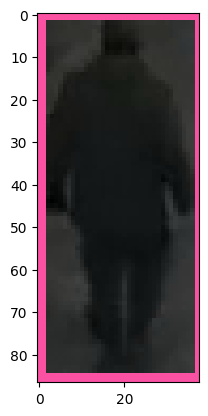

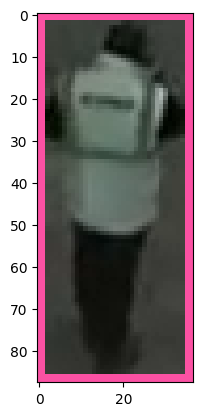

In [12]:
# crop  people using the bounding box
cropped_images = []
for i, detection in enumerate(detections):
    cropped_images.append(sv.crop_image(frame, xyxy=detection[0]))
    plt.imshow(cropped_images[i])
    plt.show()